<a id="top"></a>
# A functional guide to `matplotlib` for second year students

#### Joshua Hayes, 17.07.2019



Second year labs are a step-up from first year. The experiments are more involved, the physics is often harder, and the expectations of your demonstrators are higher. One of the areas with which students often find difficult is generating publication-quality plots. Many people have their own preferred system which they use to generate these plots, but a common system is using the Python module `matplotlib`. This notebook is intended to serve as a guide to introduce some of the core functionality of `matplotlib`. This is by no means conclusive, and for more information you should look to the matplotlib website (https://matplotlib.org/), where there are many excellent examples available, along with extensive documentiation. 

There are many plotting libraries in many different languages available. `matplotlib` is popular partially because it is easy to pick up and use, but also very powerful once you know your way around it. `matplotlib` is inspired by the plotting routines and styles of MATLAB, which is where the name comes from. A large number of undergrads use Origin Pro, as this allows for some data analysis as well as plotting. Whilst Origin is fine for use in the lab, there is an argument to be made that you should learn to use `matplotlib` as well, as it is far more suited to producing publication-quality figures when used effectively, and can also be added directly to software pipelines without the use of a GUI, a feature which you will use extensively later on in your degree.  

Also, this is not a programming guide. It is written assuming that you have a basic knowledge of programming and the concept of how to assign variables and use functions, along with knowledge of the `numpy` module. There are a couple of places where functions are defined in code. If you struggle with these parts, speak to your friends and lab demonstrators for help.

One final thing: I have written all of the code snippets so that they will generally run on their own provided you input some values for `x` and `y`. The `import` statements at the top of most snippets are not strictly necessary within this notebook, but I have left them in to make copy and pasting these snippets easier. 


<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>
<a id="contents"></a>

[Simple plotting: what are a `Figure` and `Axes`?](#simple_plotting)

[Multiple data sets on the same axes](#multiple_data_sets)

[Formatting](#formatting)

[Multiple sets of axes on the same figure](#multiple_axes)

[Scaling axes: log plots and limits](#scaling_axes)

[Saving figures](#saving_figures)
 
[Templates](#templates)

[Common issues](#common_issues)

[A brief introduction to object oriented programming](#OOP_intro)


### A quick note on syntax and the two approaches to `matplotlib`

Those of you who have used `matplotlib` in the past may be used to seeing things like 

`import matplotlib.pyplot as plt`
`plt.plot(x,y)`

This is one of the two main approaches to using `matplotlib`, which involves calling the package. In this guide, I will **not** be using `plt.plot(x,y)`, favouring instead intialising `Figures` and `Axes`, making use of the object oriented nature of the package. Don't be put off by this. Using `plt.plot`, `plt.label` etc. is a valid approach, but you will find that it limits you further down the road, as you have less control over your code and presentation. Usage of 

`fig, ax = plt.subplots()`
`ax.plot(x,y)`

allows you to have far greater control over what data are being plotted on which axes, and you can manipulate each `Figure` and `Axes` individually and precisely. Have a look at the [object oriented guide](#OOP_intro) for a little more insight into this, or speak to your lab demonstrators.

The one exception to this is my use of `plt.show()`. This will display all Figures held in the memory of the computer which have not yet been displayed. You can also display a specific Figure (called e.g. `fig`) by using `fig.show()`. I use `plt.show()` because it makes little difference here.  

<a id='Basics'></a>
## The `matplotlib`  basics

<a id='simple_plotting'></a>
### Simple plotting: what are a `Figure` and `Axes`?

Basic usage of `matplotlib` involves using `Figure` and `Axes` objects. You can read more about what objects are and how they work [here](#OOP_intro), but for now, we will just say that you can think of a `Figure` as a canvas onto which we will put any sets of axes we will plot on, and an `Axes` object as the actual axes onto which we plot. A `Figure` contains `Axes`, and `Axes` get data plotted onto them. Also note that a `Figure` is a `matplotlib` object and a figure is a term used to describe any plot. Keep an eye on the font and watch for the capital F.

We will be working using a simple set of data:

In [1]:
import numpy as np

x = np.linspace(0,10, 11)
y = 0.5*x**2

If we want to plot $x$ and $y$, we can create a `Figure` and `Axes` very easily using the `subplots` function:

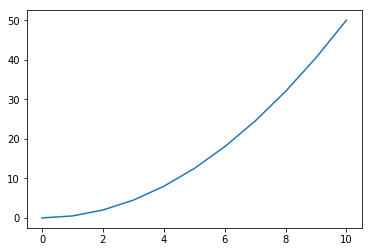

In [2]:
import matplotlib.pyplot as plt

# Create the Figure and Axes
fig, ax = plt.subplots()

# Plot the data
ax.plot(x, y)

# Show all the plots
plt.show()

Excellent, we have made our first plot! We will talk more about `plt.subplots` later on. 

This is very basic though, and is missing many things which make a good figure. Adding axis labels and a title is a good place to start. Let's make the plot again, but with labels and a title:

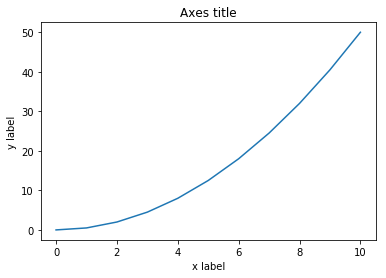

In [3]:
import matplotlib.pyplot as plt

# Create the Figure and Axes
fig, ax = plt.subplots()

# Plot the data
ax.plot(x, y)

# Set the title and axes labels
ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_title('Axes title')

# Show all the plots
plt.show()

[Back to top](#top)

<a id='multiple_data_sets'></a>
### Multiple data sets on the same axes

Sometimes it is desirable to plot more than one dataset on the same axes, usually for easy comparison. This is super easy to do in `matplotlib`. We will use the following data here:

In [4]:
import numpy as np

x = np.linspace(0,10, 11)
y1 = 0.5*x**2
y2 = x

To plot $y_1$ and $y_2$ on some axes, we can run

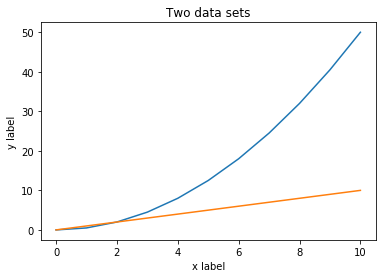

In [5]:
import matplotlib.pyplot as plt

# Create the Figure and Axes
fig, ax = plt.subplots()

# Plot the data - We just call this every time we want to plot some data on the Axes
ax.plot(x, y1)
ax.plot(x, y2)

# Set the title and axes labels
ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_title('Two data sets')

# Show all the plots
plt.show()

We have made sure to label our axes and give a title here, but now that we are plotting multiple data sets, this isn't enough. We need to make sure our data are labelled correctly and a legend is provided with the axes. 

`matplotlib` makes legend generation very easy. All we need to do is make sure we provide some labels whenever we call `ax.plot` and then add one more line of code, as we show here:

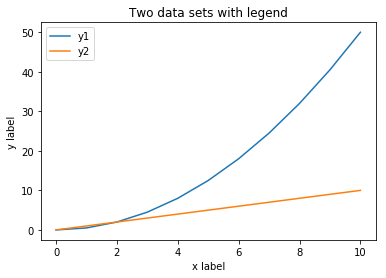

In [6]:
import matplotlib.pyplot as plt

# Create the Figure and Axes
fig, ax = plt.subplots()

# Plot the data - note that we now have added the 'label' keyword 
ax.plot(x, y1, label='y1')
ax.plot(x, y2, label='y2')

# Set the title and axes labels
ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_title('Two data sets with legend')

# Add the legend
ax.legend() 

# Show all the plots
plt.show()

You can have as many labels as you have data sets on your axes, and `legend` will deal with it. `legend` adapts to whatever style you have plotted your data in as well (see below for how to change this), so don't worry about that either!

[Back to top](#top)

<a id='formatting'></a>
### Formatting 

So far we have let `matplotlib` do all the formatting for us. If you're just plotting something up quickly to visualise, then that is fine, but if you want to have a publishable quality figure, for example to put in to a lab report, then you want to spend a little time tweaking the appearance of your figure. 

We are going to stick with using `ax.plot` and editing the plots which this produces. If you find yourself using one of the other types of plot available, you might have to have a read of the `matplotlib` documentation to figure out (ha) exactly how to format the particular type of plot you're working on. 

Let's go back to our two data sets, with a couple of extras, and see how we can change the formatting.

In [7]:
import numpy as np

x = np.linspace(0,10, 11)
y1 = 0.5*x**2
y2 = x
y3 = 2*x + 10
y4 = -0.5*x**2 + 50

The main things we might want to consider when looking at format are:
- shape and size of the marker
- thickness of lines
- color of the lines and markers
- font size

`matplotlib` makes most of these very easy to control through using keywords in the appropriate functions. 

The `fmt` string is the simplest way of controlling marker and line styles. A full list of accepted formats is available at https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html, 
but here are some common ones:

- 'b-' : blue solid line
- 'b-+' : blue solid line with plus markers
- 'rx' : no lines, red cross markers
- 'gx--' : green, cross markers, dashed line

We can change the size of the marker and the thickness of the line by using the keywords `markersize` and `linewidth`.

Here we can see how these appear:

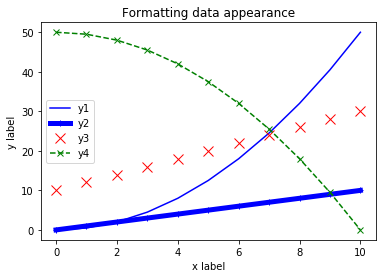

In [8]:
import matplotlib.pyplot as plt

# Create the Figure and Axes
fig, ax = plt.subplots()

# Plot the data
# Note that the format string comes AFTER the x and y
ax.plot(x, y1, 'b-', label='y1')
ax.plot(x, y2, 'b-+', label='y2', linewidth=5)
ax.plot(x, y3, 'rx', label='y3', markersize=10)
ax.plot(x, y4, 'gx--', label='y4')

# Set the title and axes labels
ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_title('Formatting data appearance')

# Add the legend
ax.legend() 

# Show all the plots
plt.show()

Note that the legend placement is intelligent - `matplotlib` does its best to place the legend where it won't cover a load of data. 

One of the main problems which student encounter with making figures is having axis labels with a readable fontsize. The default fontsize is often too small to be used in a report, and so you will need to change it to make publishable figures!

The quickest and easiest way to do this is to set the fontsize with `fontsize=X` when you add text to a figure. You can see below that we have to call this when we set the x or y label, or the title. This won't affect the size actual numbers on the axes. To do this, we need to call `ax.tick_params`. This is a function which lets us directly edit the parameters of the ticks. There's a lot you can do with it, but let's just worry about font size for now. Annoyingly, the keyword for this is `labelsize`, NOT `fontsize`. If you want to look more at what you can do with `tick_params`, look [here](https://bit.ly/2XZIk9C).

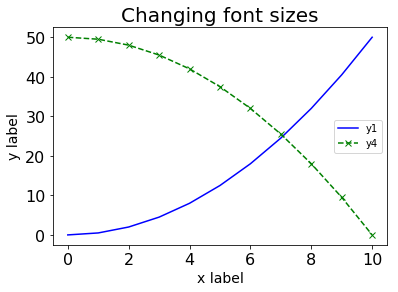

In [9]:
import matplotlib.pyplot as plt

# Create the Figure and Axes
fig, ax = plt.subplots()

# Plot the data
# Note that the format string comes AFTER the x and y
ax.plot(x, y1, 'b-', label='y1')
ax.plot(x, y4, 'gx--', label='y4')

# Set the title and axes labels
ax.set_xlabel('x label', fontsize=14)
ax.set_ylabel('y label', fontsize=14)
ax.set_title('Changing font sizes', fontsize=20)

# Set the tick label parameters
ax.tick_params(axis='both', labelsize=16)

# Add the legend
ax.legend() 

# Show all the plots
plt.show()

If you want to set default values for things like fontsize, or to choose your default font etc, then know that this is possible! We won't discuss it here, but if you go and look up **rcParams** and **matplotlibrc**, then you'll find yourself in a wonderful world of setting defaults so all your plots look great automatically. The first result on a Google search takes you to the `matplotlib` documentation [here](https://matplotlib.org/users/customizing.html), but you will probably want to browse StackOverflow and other useful websites for help. 

[Back to top](#top)

<a id='multiple_axes'></a>
### Multiple axes on the same figure

Up until now, we have only had one set of axes on each figure. Sometimes you want more than that though, and `matplotlib` can handle this happily. The first line of code in each of our plots so far has been `fig, ax = plt.subplots()`. This is where you can specify the number of plots and the layout within. The signature of `subplots` looks like this:

`matplotlib.pyplot.subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)`

The full description of what everything does can be found [here](
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots.html), but lets look at the first 4 arguments. Think of the plots that you want as if they are in a table in the `Figure`. `nrows` and `ncols` determines the number of rows and columns that table has. `sharex` and `sharey` are flags that you can use to make sure that the axes on your subplots are scaled the same, which is especially useful if you are wanting to compare data, or do something like plot residuals. 

One final thing to note is that if there is more than one set of axes (i.e. not the default of `nrows=1` and `ncols=1`), then `ax` will not be an `Axes` object, but an array of `Axes` which you have to access via index notation (see below). 

Using the 4 data sets from before, let's plot them each on a 2x2 set of axes. We will also use the keyword `figsize` to set a specific size for the figure.

In [10]:
import numpy as np

x = np.linspace(0,10, 11)
y1 = 0.5*x**2
y2 = x
y3 = 2*x + 10
y4 = -0.5*x**2 + 50

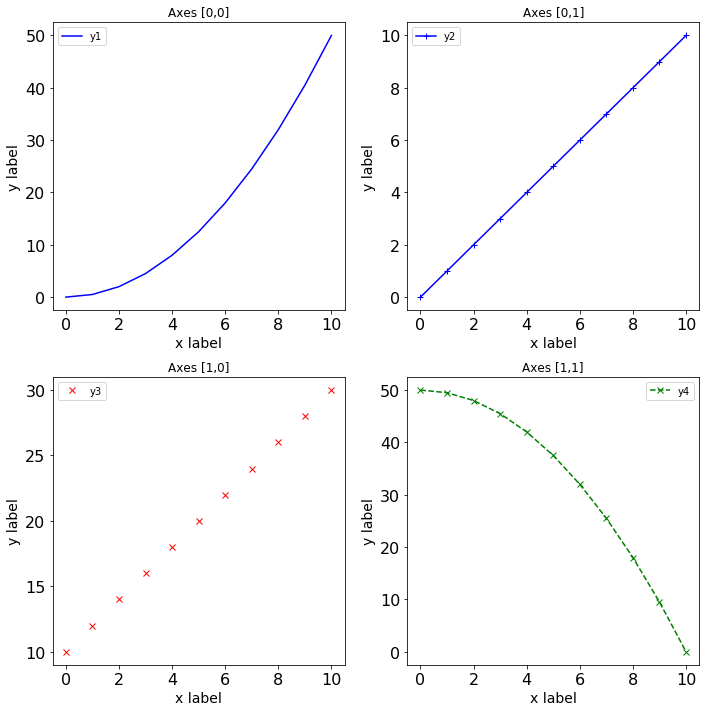

In [11]:
import matplotlib.pyplot as plt

# Create the Figure and Axes
fig, ax = plt.subplots(2, 2, figsize=(10,10))

# Plot the data. We will format each axes individually
ax[0,0].plot(x, y1, 'b-', label='y1')
ax[0,0].set_xlabel('x label', fontsize=14)
ax[0,0].set_ylabel('y label', fontsize=14)
ax[0,0].set_title('Axes [0,0]')
ax[0,0].tick_params(axis='both', labelsize=16)
ax[0,0].legend()

ax[0,1].plot(x, y2, 'b-+', label='y2')
ax[0,1].set_xlabel('x label', fontsize=14)
ax[0,1].set_ylabel('y label', fontsize=14)
ax[0,1].set_title('Axes [0,1]')
ax[0,1].tick_params(axis='both', labelsize=16)
ax[0,1].legend()

ax[1,0].plot(x, y3, 'rx', label='y3')
ax[1,0].set_xlabel('x label', fontsize=14)
ax[1,0].set_ylabel('y label', fontsize=14)
ax[1,0].set_title('Axes [1,0]')
ax[1,0].tick_params(axis='both', labelsize=16)
ax[1,0].legend()

ax[1,1].plot(x, y4, 'gx--', label='y4')
ax[1,1].set_xlabel('x label', fontsize=14)
ax[1,1].set_ylabel('y label', fontsize=14)
ax[1,1].set_title('Axes [1,1]')
ax[1,1].tick_params(axis='both', labelsize=16)
ax[1,1].legend()

# Make it so that none of the labels etc overlap!
fig.tight_layout()

# Show all the plots
plt.show()

You might have spotted that we used `fig.tight_layout()` at the end there. This is a super useful function which shifts the `Axes` around slightly so that none of them overlap. Make sure to add this in. Also, since we did not use `sharey=True`, note that the y-axes are all scaled to take up as much space as possible on each subplot.

[Back to top](#top)

<a id='scaling_axes'></a>
### Scaling axes: log plots and limits

Depending on your data, it might be useful to rescale the axes or to limit the range of each axis. By default, `matplotlib` plots all the data it is given, and its axes have a linear scale. If you want to change these, there are a few handy functions provided by `matplotlib`. 

##### Changing axis scale
If you need to change the scale of your axes to logarithmic, you *could* take the log of your data and plot this. However, you might find this confusing once you try and use the data again (I have done this myself and it's not great fun..). Alternatively, you can use `ax.set_xscale` or `ax.set_yscale` to just rescale the data for the plot:

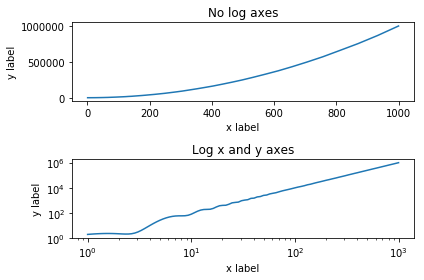

In [12]:
import numpy as np 
import matplotlib.pyplot as plt

# Make some data
x = np.logspace(0,3, 100)
y = 2*x * np.cos(x) + x**2

# Make a plot
fig, ax = plt.subplots(2,1)

# Plot without log scales
ax[0].plot(x, y)
ax[0].set_title('No log axes')
ax[0].set_xlabel('x label')
ax[0].set_ylabel('y label')

# Plot with log x and y
ax[1].plot(x, y)
ax[1].set_title('Log x and y axes')
ax[1].set_xlabel('x label')
ax[1].set_ylabel('y label')
ax[1].set_xscale('log')
ax[1].set_yscale('log')

fig.tight_layout()

plt.show()

`matplotlib` also provides a few wrapper functions which do the plotting and rescaling for you. These are:

- `semilogx` : plot with x log scaled
- `semilogy` : plot with y log scaled
- `loglog`: plot with both x and y log scaled

##### Changing axis limits. 

There are many situations where you want to be able to control the limits of your axes. This can be done with `ax.set_xlim` and `ax.set_ylim`:

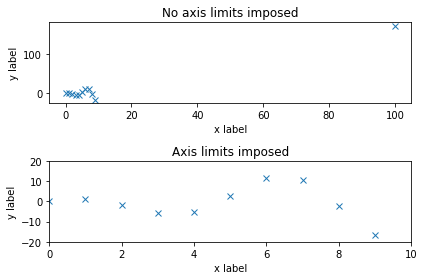

In [13]:
import numpy as np 
import matplotlib.pyplot as plt

# Make some data
x = np.array([0,1,2,3,4,5,6,7,8,9,100])
y = 2*x * np.cos(x)

# Make a plot
fig, ax = plt.subplots(2,1)

# Plot with all data
ax[0].plot(x, y, 'x')
ax[0].set_title('No axis limits imposed')
ax[0].set_xlabel('x label')
ax[0].set_ylabel('y label')

# Plot with x axis limited to 0-10 and y to -20-20
ax[1].plot(x, y,'x')
ax[1].set_xlim(0,10)
ax[1].set_ylim(-20,20)
ax[1].set_title('Axis limits imposed')
ax[1].set_xlabel('x label')
ax[1].set_ylabel('y label')


fig.tight_layout()

plt.show()

You can see from this example above that setting the axis limits is a very useful way of being able to zoom in on a particular set of data without having to actualy work on making copies of the data and trimming it all yourself. 

[Back to top](#top)

<a id='saving_figures'></a>
### Saving  figures

If you want to save a figure, for using in presentations and reports, `matplotlib` makes this super easy with `savefig`. Since you are wanting to save the full canvas, this part of code works on the `Figure` object, not the `Axes`. Let's make a sample figure and save it:

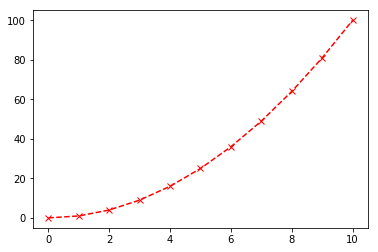

In [14]:
import matplotlib.pyplot as plt
import numpy as np 

x = np.linspace(0,10,11)
y = x**2

fig, ax = plt.subplots()

ax.plot(x, y, 'rx--')

fig.savefig('sample_figure.pdf')

plt.show()

`Figure.savefig` is very clever in being able to save things in whatever format you use for the file extension (assuming it's a graphical format!). The two most common are .png, which is the default (used if you don't specify), and .pdf.

.png are pixellated, and you can set the resolution using the `dpi=` keyword in `savefig`. DPI stands for dots per square inch - the higher the number, the more pixels you have in the figure. 

For publication-quality plots, use .pdf! PDF images are what are known as vector graphics, which basically means that they don't suffer from pixellation as you change the size of the image. 

Generally, the only time I would recommend using .png over .pdf is if there are a very large number of points on your figure and the file size is getting large in .pdf format. Since .png is a set file size (once DPI is set), there is no scaling with number of points. 

One last thing on saving: sometimes you might find that even when using `fig.tight_layout()` some of the figure is cut off in the final .pdf. Don't worry about why too much, but know that there is a simple solution. When you use `savefig`, add in the keyword `bbox_inches='tight'`. So the saveline from above becomes

`fig.savefig('sample_figure.pdf', bbox_inches='tight')`

and this will ensure that even if `plt.show()` shows your figure with some part cut off, the saved .pdf will have saved the full image!

[Back to top](#top)

<a id='templates'></a>
## Some templates

Here are a few template plots which you might find useful in the course of your degree:

### Residuals and errorbar
Often you will want to plot the residuals between a fit and your data. Let's simulate some data and then show how to display this nicely. Note that we are using `errorbar` rather than plot to make sure we get some error bars in there!

In [15]:
# Simulate some data
import numpy as np 

def make_model_data(x):
    ''' This is the 'true' model '''
    return (np.cos(x) + x**2) * np.exp(-x)

def make_simulated_data(y, noise_level=0.1):
    '''Adds some noise to simulated data'''
    # simulate a gaussian noise for each data point
    noise = np.random.normal(0, noise_level, len(y))
    return y + noise, noise


x = np.linspace(0, 10, 100)
model = make_model_data(x)
simulated, errors = make_simulated_data(model)

residuals = simulated - model

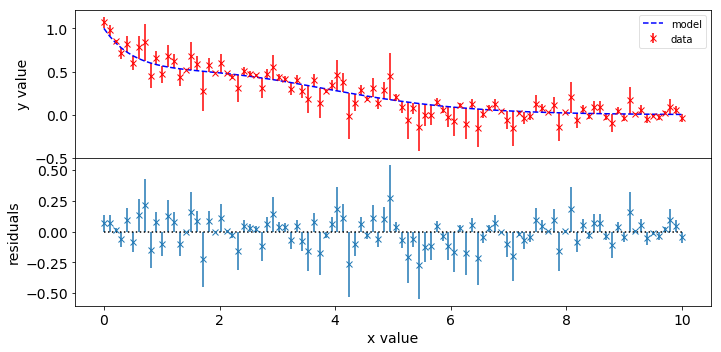

In [16]:
import matplotlib.pyplot as plt

# Make 2 Axes, with shared x axis
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10,5) )

# Plot the data and overlay the model
ax[0].errorbar(x, simulated, yerr=errors, fmt='rx', label='data')
ax[0].plot(x, model, 'b--', label='model')
ax[0].legend(fancybox=True, framealpha=0.6)
ax[0].set_ylabel('y value', fontsize=14)
ax[0].tick_params(axis='both', labelsize=14)

# Plot the residuals and add a dotted line at y=0
ax[1].errorbar(x, residuals, errors, fmt='x')
ax[1].hlines(0, x[0], x[-1], linestyles='dotted') 
# hlines plots a horizontal line at y between xmin and xmax
# You could also have done this with ax.plot([xmin, xmax], [0,0])
ax[1].set_xlabel('x value', fontsize=14)
ax[1].set_ylabel('residuals', fontsize=14)
ax[1].tick_params(axis='both', labelsize=14)

fig.tight_layout()

# Remove the whitespace between the plots
fig.subplots_adjust(hspace=0)
'''
Make sure you run tight_layout BEFORE subplots_adjust,
otherwise tight_layout will undo the subplots_adjust.
'''


plt.show()

[Back to top](#top)

<a id='common_issues'></a>
### Common issues

Here are a few common issues which people, especially those who are new to using `matplotlib` and programming, can encounter. 

##### NameError: name 'foo' is not defined

This error comes from not intialising your variables. You might type something like 

In [17]:
ax1.plot()

NameError: name 'ax1' is not defined

and see the error. This is because you haven't written a line where you set `ax1` as a variable! Make sure you have included something like 

`fig, ax1 = plt.subplots()`

##### missing required positional argument: 'self'

If you see something like this:

In [18]:
plt.Figure.add_axes()

TypeError: add_axes() missing 1 required positional argument: 'self'

then what you have encountered is a common error among those who are new to using object oriented programming (see [below](#OOP_intro)).

In short, what the problem line is doing is calling the class, rather than an instance of the class. To operate on an object, the object must first be initialised, else the code doesn't know what it is trying to work on. Imagine we have an object called `Dog`, which contains the method `Dog.bark()`. If we try and make one dog bark by using `Dog.bark()`, the code wouldn't know which dog to make bark. The code can do two things at that point - either break, which is sensible, or make all the `Dogs` bark, which is not. Initialise your objects.



##### Some of my figure is being cut off in the save file!

Sometimes, especially if you have large axis labels which use fractions, or fancy layouts, `matplotlib` can cut off the edges of your figures when displaying or saving them. Luckily there's a quick solution to this. When you use `savefig`, add in the keyword `bbox_inches='tight'`. So the saveline from [above](#saving_figures) becomes

`fig.savefig('sample_figure.pdf', bbox_inches='tight')`

and this will ensure that the saved .pdf will have saved the full image!

[Back to top](#top)

## A final word

Everything in this document is designed to provide a quick, accessible guide for `matplotlib` beginners. As you get more confortable with using `matplotlib` and coding in general, you may find yourself trying to do things which aren't explained in here. Know that it is possible to plot almost anything in `matplotlib`, so if you want to find out more about how to customise your plots further, then Google, StackExhange and StackOverflow are your friends. In all honesty, most competent programmers don't know most of the commands they use. The main skill that they have developed is knowing how to Google things efficiently. 

Finally, if you spot any errors in this document, or have some suggestions as to what to include, please inform the lab tutor. 

[Back to top](#top)

<a id='OOP_intro'></a>
## A quick intro to object oriented programming (bonus)

This bonus section is useful for anyone who wants to understand what the code written above actually means. I would recommed reading it at some point, as understanding what objects are in programming is incredibly useful. Note that this is intended to serve as an introduction to get you used to thinking about OOP, and how you might go about starting to program using OOP, rather than a fully detailed computer science course. There is a course available later in your degree which goes into using OOP.

Python, like C++ and Java, is an object oriented programming language. All this means is that rather than separately dealing with a lot of different variables or lists all associated with one thing, all variables associated with a thing are kept in a container, called a Class. 

To illustrate this, let's look at the example of making a catalogue of stars. We are interested in the type, temperature, and distance of a star. Without using object oriented programming, we could build our catalogue by constructing a series of lists for each attribute:

In [19]:
star_type = ['K','O','M','G']  # Stellar class
temperature = [4000,35000,2700,5500]  # Temperature of the star
distance = [1.2, 2.4, 1.8, 8.9]  # Distance to the star in kpc

If we want to print the information associated with, say, star 2 (remembering that in Python we start counting from 0), we would have to type

In [20]:
print(star_type[2], temperature[2], distance[2])

M 2700 1.8


Now, this is fine, but a little cumbersome. As we extend the number of stars in the catalogue, or the amount of information we want have on each star, you can see how even displaying the info on a star will get unwieldy. If we want to start manipulating the data, codes will swifly get very bulky and unreadable. 

What would make far more sense would be if instead of building the catalogue as a list of all the attributes, divided by stars, we just have a list of stars, and find a nice, clean way to keep all information associated with a given star in one place. This is where classes come in.

The best way to think of a class is as a container for information. A simple example of a Star class can be written like this:

In [21]:
class Star:
    def __init__(self, star_type, temperature, distance):
        '''This class is an individual star. 
        '''
        self.star_type = star_type
        self.temperature = temperature
        self.distance = distance
    
    def print_info(self):
        '''Prints the info of a star nicely'''
        print('Type = {}'.format(self.star_type)) 
        # format() fills in the {} with whatever is in the brackets
        print('Temperature = {} K'.format(self.temperature))
        print('Distance = {} kpc'.format(self.distance))
        
    def supernova():
        print('BANG')

Here we can introduce the two features of a class: methods and attributes. Simply put, a method is a function which is contained within a class, and an attribute is a variable associated with a class. If we want to make an instance of this class, we can write

In [22]:
star1 = Star('K', 4000, 1.2)

When we call the class like this, the arguments are passed to the `__init__` function. 

If we want to access a method or attribute of a class instance, we can use the dot notation. For example:

In [23]:
# Access the temperature of star1:
star1.temperature

4000

In [24]:
# Call the print_info function:
star1.print_info()

Type = K
Temperature = 4000 K
Distance = 1.2 kpc


The protected word `self` is very important to OOP in Python. Whenever a method within a class wants to access an attribute or method which is part of the class, such as in the `print_info` function, `self` is used with the dot notation to access the method or attribute. You may have spotted that in the intialisation of star1 and in the call of `print_info`, we didn't provide a value for `self`. You never have to do this, and in documentation you can functionally ignore it as an argument when providing values to a function. 

So, if we are using `matplotlib` and plot something on the axes

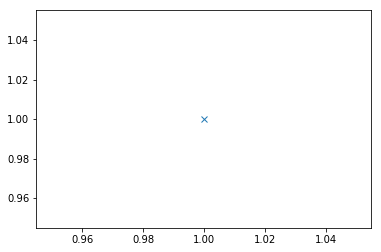

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1)

ax.plot(1, 1, 'x')

plt.show()

we can see that the axes are an object, and the line `ax.plot` is us calling a method! 

Obviously the underlying code to an `Axes` object in `matplotlib` is much more complicated than out `Star` example, but the principal is the same. If you are ever trying to work out how to change something on a plot, first consider which part of the plot you are trying to change. Adding labels to axes? You'll need to use a method from an `Axes` object. What to change the size of the figure itself? Use the `Figure` object.

[Back to top](#top)